# Ensemble Learning and Random Forest
## Language: Python
## Author: Zheyi Wang
***
## Contents
- Introduction
- Algorithm
    - Ensemble Learning
    - Bootstrap Aggregating (Bagging)
    - Random Forest
- Pros and Cons of each algorithm
- Code and Application
    - Ensembling Learning
    - Bagging
    - Random Forest
***
## Introduction
[Ensemble methods](https://en.wikipedia.org/wiki/Ensemble_learning) use multiple learning algorithms to obtain better predictive performance, which is predicted by majority of vote for classification or average for regression, than could be obtained from any of the constituent learning algorithms alone. Generally speaking, the models we pick for ensembling will be "dumb learners", meaning models that are barely superior to randomly guessing. Individually the models will perform poorly, but collectively will perform well.

[Bootstrap aggregating (bagging)](https://www.mastersindatascience.org/learning/machine-learning-algorithms/bootstrapping/) method is used in ensemble learning. Bootstrapping is a method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process. In the context of machine learning, a given set of machine learning model is trained respectively on random samples of training data with replacement, then the combined predictions of each model is aggregated and used as a single prediction. For regression tasks this would mean taking the average of the set of model prediction, and for classification taking the majority vote.


[Random Forest](https://en.wikipedia.org/wiki/Random_forest) Random Forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. It use the predictions of the most trees to generate final predictions, and each decision tree is 'dumb learners' while the random forests ensemble these 'dumb learners' together

## Algorigthm
### Ensemble Learning
Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models. It takes the majority vote (for classification) or average (for regression) of all weak learners, as the prediction of ensemble learning model. In order that ensemble methods works, all weak leraners should be uncorrelated with each other as much as possible. Bagging, boosting, and stacking are the most common three classes of ensemble leawrning.

### Bagging
This procedure of using the bootstrap method is summarized as follows:
1. Choose a number of bootstrap samples to perform
2. Choose a sample size
3. For each bootstrap sample
    1. Draw a sample with replacement with the chosen size
    2. Fit a model on the data sample
4. Aggregate models

### Random Forest
Apply the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set $X$ with responses $y$,  repeatedly $B$ times samples with replacements of the training set and fits trees to these samples:
For b = 1,...,B:
- Sample with replacement $n$ training examples from $X,Y$, as $X_b, Y_b$. 
- Train a tree $f_b$ on $X_b,y_b$. In each split of a tree, only a random subset of the features are able to be selected. This process is sometimes called "feature bagging".

After training, predictions for unseen samples $x'$ can be made by averaging the predictions from all the individual regression trees on $x'$:
$$ \hat f = \cfrac{1}{B} \sum_{b=1}^{B} f_b(x')$$

## Illustraiton by plot
### The illustration of bagging method
<img src="Bootstrapping.png" width = "600" height = "500" alt="Bootstraping Illustration" align=center />

### The illustration of random forest
![avatar](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

## Pros and Cons of Random Forest

### Pros
- Accuracy of Random forest is generally very high
- Its efficiency is particularly Notable in Large Data sets
- It works well with both categorical and continuous values
- Provides an estimate of important variables in classification
- Forests Generated can be saved and reused
- Unlike other models It does nt overfit with more features

### Cons
- It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
- It also requires much time for training as it combines a lot of decision trees to determine the class.
- Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

## Code and Applicationt
- Dataset: Wine Dataset


#### import packages

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

import warnings

Load Wine Dataset

In [12]:
warnings.filterwarnings("ignore")
X, y = load_wine(return_X_y=True, as_frame=True)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Split data into training and test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=0)

First let's try logistic regression classifier, SVC classifier and decision tree classifier independently, to check their performances.

Use logistic regression classifier, multi-layer perceptron classifier and decision tree classifier to build an ensemble model for classify wine types.

In [14]:
log_clf = LogisticRegression()
rnd_clf =RandomForestClassifier()
svm_clf = SVC()
models = [log_clf,rnd_clf,svm_clf]
for clf in models:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

    


LogisticRegression, accuracy score = 0.9305555555555556
RandomForestClassifier, accuracy score = 0.9722222222222222
SVC, accuracy score = 0.6805555555555556


Looks like logistic regrssion and random forest has a better performance, but SVM performs not so well.

Then, plot the confusion matrice of three models.

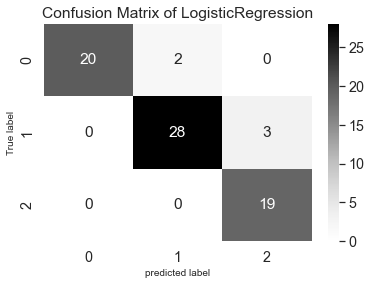

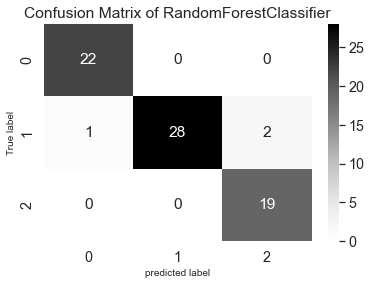

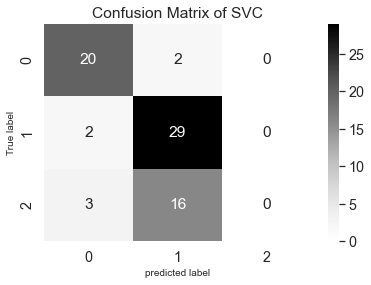

In [24]:
for clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    matrix_df = pd.DataFrame(confusion_matrix)

    plt.figure()
    ax=plt.axes()
    sns.set(font_scale=1.3)

    sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='Greys')
    ax.set_title(f'Confusion Matrix of {clf.__class__.__name__}')
    ax.set_xlabel('predicted label', fontsize=10)
    ax.set_ylabel('True label', fontsize=10)
    plt.show()

Logistic Regression and Random Forest have similar predictions, but SVC tend to wrongly predict 2 as 1, which accounts most of errors in predictions.

In [31]:
voting_clf = VotingClassifier(
    estimators=[("lr",log_clf),("rf",rnd_clf),("svm",svm_clf)]
    ,voting = "hard")

voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(X_test)
print(f"voting classifier accuracy:{accuracy_score(y_test,y_predict)}")

voting classifier accuracy:0.9583333333333334


The voting classifier's accuracy is higher than logistic but lower than random forest.

Then, we check the confusion matrix

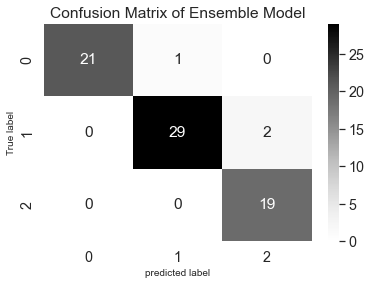

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure()
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='Greys')
ax.set_title('Confusion Matrix of Ensemble Model')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

### Bagging(Bootstrap Aggregating) with Decision Tree

We train each decision tree learner on a random subset of the training data set (with replacement)

In [33]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(f'{bag_clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

BaggingClassifier, accuracy score = 0.9722222222222222


The accuracy shows that the bagging model performs as same as the random forest, but better than ensemble classifier.
Then, we check the confusion matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

Random Forest

In [ ]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print(f'{rnd_clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure()
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

The Random Forest has the same accuracy as bagging method. It might be the reason that this dataset is realative easy to classify, and random forest has already done well. Thus, bagging method barely has improvement. Besides, bagging method and random forest are basically the same algorithm, which might explain why they have the same prediction accuracy.

Let's see the feature importance in the random forest model.

In [54]:
from numpy import sort


f_importance = rnd_clf.feature_importances_
features = X.columns
f_imp_dict = dict(zip(list(features),list(f_importance)))
#f_imp_dict = {features[i]: f_importance[i] for i in range(len(features))}
sorted_dict = sorted(f_imp_dict.items(), key= lambda kv:(kv[1],kv[0]),reverse=True)

print('The feature importance shown in descending order is ')
for i in range(len(sorted_dict)):
    print(f'number {i+1}, {sorted_dict[i][0]},importance value = {round(sorted_dict[i][1],3)}')

The feature importance shown in descending order is 
number 1, color_intensity,importance value = 0.171
number 2, flavanoids,importance value = 0.147
number 3, alcohol,importance value = 0.142
number 4, proline,importance value = 0.128
number 5, od280/od315_of_diluted_wines,importance value = 0.127
number 6, hue,importance value = 0.09
number 7, total_phenols,importance value = 0.081
number 8, alcalinity_of_ash,importance value = 0.039
number 9, malic_acid,importance value = 0.027
number 10, proanthocyanins,importance value = 0.014
number 11, nonflavanoid_phenols,importance value = 0.013
number 12, magnesium,importance value = 0.013
number 13, ash,importance value = 0.008
